In [8]:
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
import sys

from matplotlib import rc

rc('font', **{'family': 'sans-serif', 'sans-serif': 'cm'})
rc('text', **{'usetex': True,
              'latex.preamble': r'\renewcommand{\familydefault}{\sfdefault}'
              r' \usepackage{sansmath} \sansmath'})
rc('figure', **{'dpi': 200})




In [9]:
results = pd.read_json('workspace/structured-ips/bsgp.json')

In [10]:
results_dkl_powerplant = pd.read_json('workspace/structured-ips/results_dkl_powerplant.json')
results_dkl_powerplant['name'] = 'DKL + KISS-GP'
results_dkl_powerplant = results_dkl_powerplant[['model', 'dataset', 'fold', 'test_mnll', 'name']]
results = pd.concat([results, results_dkl_powerplant], ignore_index=True)

In [11]:
results_dkl_protein = pd.read_json('workspace/structured-ips/results_dkl_protein.json')
results_dkl_protein['name'] = 'DKL + KISS-GP'
results_dkl_protein = results_dkl_protein[results_dkl_protein.grid_size == 100][['model', 'dataset', 'fold', 'test_mnll', 'name']]
results = pd.concat([results, results_dkl_protein], ignore_index=True)

In [12]:
results_dkl_kin8nm = pd.read_json('workspace/structured-ips/results_kin8nm.json')
results_dkl_kin8nm['name'] = 'DKL + KISS-GP'
results_dkl_kin8nm = results_dkl_kin8nm[results_dkl_kin8nm.grid_size == 100][['model', 'dataset', 'fold', 'test_mnll', 'name']]
results = pd.concat([results, results_dkl_kin8nm], ignore_index=True)

In [13]:
results_kiss_powerplant = pd.read_json('workspace/structured-ips/results_kiss_powerplant.json')
results_kiss_powerplant['name'] = 'KISS-GP'
results_kiss_powerplant = results_kiss_powerplant[['model', 'dataset', 'fold', 'test_mnll', 'name']]
results = pd.concat([results, results_kiss_powerplant], ignore_index=True)

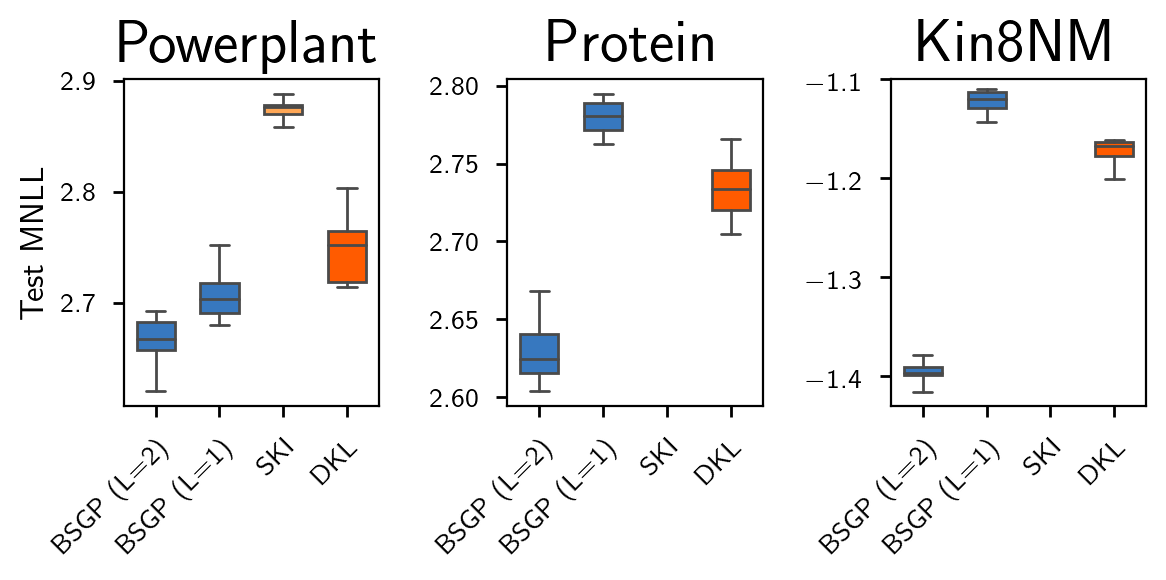

In [14]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=[6, 3], dpi=200)

colors = ["windows blue"]*2 + ["light red"]*0 + ['pale orange']*1 + ["bright orange"]*2
cp = sns.xkcd_palette(colors)

order = ['BSGP (L=2)', 'BSGP (L=1)', 'KISS-GP', 'DKL + KISS-GP']

sns.boxplot(data=results[results.dataset == 'powerplant'], y='test_mnll', x='name', width=.6, linewidth=1, saturation=1, ax=ax0, order=order, palette=cp)
sns.boxplot(data=results[results.dataset == 'protein'],    y='test_mnll', x='name', width=.6, linewidth=1, saturation=1, ax=ax1, order=order, palette=cp)
sns.boxplot(data=results[results.dataset == 'kin8nm'],     y='test_mnll', x='name', width=.6, linewidth=1, saturation=1, whis=5, ax=ax2, order=order, palette=cp)

ax2.set_ylim(ax2.get_ylim()[0]*1.01, -1.1)

labels = ['BSGP (L=2)', 'BSGP (L=1)', 'SKI', 'DKL']
ax0.set_xticks(range(len(labels)))
ax1.set_xticks(range(len(labels)))

ax0.set_xticklabels(labels, rotation=45, ha="right", rotation_mode="anchor")
ax1.set_xticklabels(labels, rotation=45, ha="right", rotation_mode="anchor")
ax2.set_xticklabels(labels, rotation=45, ha="right", rotation_mode="anchor")

ax0.margins(0, 0.05)
ax1.margins(0, 0.05)
ax2.margins(0, 0.05)

ax0.set_ylabel('Test MNLL')
ax1.set_ylabel('')
ax2.set_ylabel('')

ax0.set_xlabel('')
ax1.set_xlabel('')
ax2.set_xlabel('')

ax0.set_title('Powerplant')
ax1.set_title('Protein')
ax2.set_title('Kin8NM')
plt.show()